In [217]:
# Import libraries
import numpy as np
import pandas as pd

In [218]:
# Import files

train = pd.read_csv('../assets/train.csv')
test = pd.read_csv('../assets/test.csv')
weather = pd.read_csv('../assets/weather.csv')
spray = pd.read_csv('../assets/spray.csv')

In [219]:
# Set columns and row values to see everything
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)

In [220]:
# Check out each header
print train.columns
print test.columns
print weather.columns
print spray.columns

# Target is the WnvPresent column of train.
# No issues with column names that need renaming.

Index([u'Date', u'Address', u'Species', u'Block', u'Street', u'Trap',
       u'AddressNumberAndStreet', u'Latitude', u'Longitude',
       u'AddressAccuracy', u'NumMosquitos', u'WnvPresent'],
      dtype='object')
Index([u'Id', u'Date', u'Address', u'Species', u'Block', u'Street', u'Trap',
       u'AddressNumberAndStreet', u'Latitude', u'Longitude',
       u'AddressAccuracy'],
      dtype='object')
Index([u'Station', u'Date', u'Tmax', u'Tmin', u'Tavg', u'Depart', u'DewPoint',
       u'WetBulb', u'Heat', u'Cool', u'Sunrise', u'Sunset', u'CodeSum',
       u'Depth', u'Water1', u'SnowFall', u'PrecipTotal', u'StnPressure',
       u'SeaLevel', u'ResultSpeed', u'ResultDir', u'AvgSpeed'],
      dtype='object')
Index([u'Date', u'Time', u'Latitude', u'Longitude'], dtype='object')


In [221]:
# Ritika's EDA function for initial investigation

def eda(dataframe):
    print "missing values \n", dataframe.isnull().sum(), "\n"
    print "dataframe types \n", dataframe.dtypes, "\n"
    print "dataframe shape \n", dataframe.shape, "\n"
    print "dataframe describe \n", dataframe.describe(), "\n"
    for item in dataframe:
        print item
        print dataframe[item].nunique()

# Train EDA

In [222]:
# Train EDA - Investigate header
train.head(2)

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0


In [223]:
# Train EDA - Summary function:
eda(train)

### Quick summary:
# No missing values
# Date:  Need to convert to a timeseries
# Species:  7 uniques
# Block:  Int; may already have a useful location grouping with this
# AddressNumberAndStreet & Latitude/Longitude:  136 unique traps, but 138 locations

missing values 
Date                      0
Address                   0
Species                   0
Block                     0
Street                    0
Trap                      0
AddressNumberAndStreet    0
Latitude                  0
Longitude                 0
AddressAccuracy           0
NumMosquitos              0
WnvPresent                0
dtype: int64 

dataframe types 
Date                       object
Address                    object
Species                    object
Block                       int64
Street                     object
Trap                       object
AddressNumberAndStreet     object
Latitude                  float64
Longitude                 float64
AddressAccuracy             int64
NumMosquitos                int64
WnvPresent                  int64
dtype: object 

dataframe shape 
(10506, 12) 

dataframe describe 
              Block      Latitude     Longitude  AddressAccuracy  \
count  10506.000000  10506.000000  10506.000000     10506.000000   
mean 

In [224]:
# Convert train's date to timeseries
train["Date"] = pd.to_datetime(train["Date"], format = "%Y-%m-%d")

# Confirm:
train["Date"].head(2)

0   2007-05-29
1   2007-05-29
Name: Date, dtype: datetime64[ns]

# Test EDA

In [225]:
# Test EDA - Investigate header
test.head(2)

,Id,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy
0,1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
1,2,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9


In [226]:
# Test EDA - Summary function:
eda(test)

### Quick summary:
# Also no missing values
# ID:  Likely drop as it appears to only identify the observation
# Date:  Also needs to be converted to a timeseries
# Block:  65 here vs. 64 in train.
# Locations:  149 traps with 151 location coordinates.  Both have a difference of 2.

missing values 
Id                        0
Date                      0
Address                   0
Species                   0
Block                     0
Street                    0
Trap                      0
AddressNumberAndStreet    0
Latitude                  0
Longitude                 0
AddressAccuracy           0
dtype: int64 

dataframe types 
Id                          int64
Date                       object
Address                    object
Species                    object
Block                       int64
Street                     object
Trap                       object
AddressNumberAndStreet     object
Latitude                  float64
Longitude                 float64
AddressAccuracy             int64
dtype: object 

dataframe shape 
(116293, 11) 

dataframe describe 
                  Id          Block       Latitude      Longitude  \
count  116293.000000  116293.000000  116293.000000  116293.000000   
mean    58147.000000      41.131100      41.849389     -87.69365

In [227]:
# Convert test's date to timeseries
test["Date"] = pd.to_datetime(test["Date"], format = "%Y-%m-%d")

# Confirm:
print test["Date"].head(2)  # Note: This doesn't show the nanosecond calculation
print test["Date"][0]       # This does

0   2008-06-11
1   2008-06-11
Name: Date, dtype: datetime64[ns]
2008-06-11 00:00:00


# Spray EDA

In [228]:
# Spray EDA - Investigate header:
spray.head(2)

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163


In [229]:
# Spray EDA - Summary function:
eda(spray)

### Quick summary:
# Time:  Has missing values; compared with train and test, the time series is split between two columns
# Latitude/Longitude:  Continue to be properly recognized as float

missing values 
Date           0
Time         584
Latitude       0
Longitude      0
dtype: int64 

dataframe types 
Date          object
Time          object
Latitude     float64
Longitude    float64
dtype: object 

dataframe shape 
(14835, 4) 

dataframe describe 
           Latitude     Longitude
count  14835.000000  14835.000000
mean      41.904828    -87.736690
std        0.104381      0.067292
min       41.713925    -88.096468
25%       41.785001    -87.794225
50%       41.940075    -87.727853
75%       41.980978    -87.694108
max       42.395983    -87.586727 

Date
10
Time
8583
Latitude
12887
Longitude
13007


In [230]:
# Spray EDA - Need a datetime column combining the two
# Combine two into 1 column, then convert to datetime

# Looking at other date times, the format is date, space, time
spray["DateTime"] = spray["Date"] + " " + spray["Time"]

# Convert this to timeseries
spray["DateTime"] = pd.to_datetime(spray["DateTime"], format = "%Y-%m-%d %I:%M:%S %p")

# Reference to set up correctly:
# https://docs.python.org/2/library/datetime.html#strftime-and-strptime-behavior

In [231]:
# Confirm change
spray.DateTime.head(2)

0   2011-08-29 18:56:58
1   2011-08-29 18:57:08
Name: DateTime, dtype: datetime64[ns]

# Weather EDA

In [232]:
# Weather EDA - Investigate header:

weather.head(2)

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,0448,1849,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,-,-,,M,M,M,0.00,29.18,29.82,2.7,25,9.6


In [233]:
# Weather EDA - Summary function:

eda(weather)

### Quick summary:
# No "Null" values, but M means "missing", and Station 2 shows missing times for Sunrise and Sunset
# Date:  Needs conversion to datetime
# Sunrise/Sunset:  Missing, and need conversion to time
# CodeSum:  98 uniques.  Worth trying to parse out?
# Tavg:  Not recognized as Int. Should be as it's just the average - can hand calculate if needed.
# Depart:  Departure from normal average.  Station 2's missing values
# WetBulb: "Lowest temperature reachable under current ambient conditions by the evaporation of water only"
# Heat, Cool:  Calculated vs. 65 degree temperature.  Unsure if useful.  Also have missing "M"
# Depth:  2 unique values - 0 and M.  Drop?
# Water1:  All M.  Drop.
# SnowFall:  4 unique values.  Drop?
# PrecipTotal:  Needs to be Float.  Likely has missing values - later determined as "T"
# StnPressure:  Needs to be Float.  Likely has missing values "M"
# SeaLevel:  Needs to be Float.  Likely has missing values "M". (SeaLevel = Pressure at Sea Level)
# ResultDir:  "RESULTANT DIRECTION - (WHOLE DEGREES)"
# AvgSpeed:  Needs to be Float.

# WetBulb source:  https://en.wikipedia.org/wiki/Wet-bulb_temperature

missing values 
Station        0
Date           0
Tmax           0
Tmin           0
Tavg           0
Depart         0
DewPoint       0
WetBulb        0
Heat           0
Cool           0
Sunrise        0
Sunset         0
CodeSum        0
Depth          0
Water1         0
SnowFall       0
PrecipTotal    0
StnPressure    0
SeaLevel       0
ResultSpeed    0
ResultDir      0
AvgSpeed       0
dtype: int64 

dataframe types 
Station          int64
Date            object
Tmax             int64
Tmin             int64
Tavg            object
Depart          object
DewPoint         int64
WetBulb         object
Heat            object
Cool            object
Sunrise         object
Sunset          object
CodeSum         object
Depth           object
Water1          object
SnowFall        object
PrecipTotal     object
StnPressure     object
SeaLevel        object
ResultSpeed    float64
ResultDir        int64
AvgSpeed        object
dtype: object 

dataframe shape 
(2944, 22) 

dataframe describe 
      

In [234]:
# Investigate the columns to see how many "M" and "-" we have
print weather["Tmax"].value_counts().head(3)
print weather["Tmin"].value_counts().head(3)
print weather["Tavg"].value_counts().head(3)    
print weather["Depart"].value_counts().head(3)      # <--- Missing values
print weather["DewPoint"].value_counts().head(3)
print weather["WetBulb"].value_counts().head(3)
print weather["Heat"].value_counts().head(3)
print weather["Cool"].value_counts().head(3)
print weather["Sunrise"].value_counts().head(3)     # <--- Missing values
print weather["Sunset"].value_counts().head(3)      # <--- Missing values
print weather["CodeSum"].value_counts().head(3)     # <--- Missing or blank values
print weather["Depth"].value_counts().head(3)       # <--- 2 types - "M" and 0.  Drop?
print weather["Water1"].value_counts().head(3)      # <--- ALL "M"
print weather["SnowFall"].value_counts().head(4)    # <--- Only 4 types.  Most are "M" or 0.0
print weather["PrecipTotal"].value_counts().head(3) # --- Here down, unsure why not in already Float ---
print weather["StnPressure"].value_counts().head(3)
print weather["SeaLevel"].value_counts().head(3)
print weather["ResultSpeed"].value_counts().head(3)
print weather["AvgSpeed"].value_counts().head(3)

84    128
79    121
82    118
Name: Tmax, dtype: int64
63    121
65    111
60    109
Name: Tmin, dtype: int64
73    138
77    117
70    117
Name: Tavg, dtype: int64
M     1472
 2      93
-1      84
Name: Depart, dtype: int64
59    128
54    125
55    114
Name: DewPoint, dtype: int64
63    135
65    131
59    129
Name: WetBulb, dtype: int64
0    1870
4      88
1      86
Name: Heat, dtype: int64
 0    1147
 8     138
12     117
Name: Cool, dtype: int64
-       1472
0416     104
0417      64
Name: Sunrise, dtype: int64
-       1472
1931      96
1930      56
Name: Sunset, dtype: int64
         1609
RA        296
RA BR     238
Name: CodeSum, dtype: int64
M    1472
0    1472
Name: Depth, dtype: int64
M    2944
Name: Water1, dtype: int64
M      1472
0.0    1459
  T      12
0.1       1
Name: SnowFall, dtype: int64
0.00    1577
  T      318
0.01     127
Name: PrecipTotal, dtype: int64
29.34    128
29.28    124
29.26    123
Name: StnPressure, dtype: int64
30.00    96
29.94    85
29.98    85
Name

# Dealing with sunrise/sunset
Idea:  Number of daylight minutes in a day having any effect?

In [235]:
# Plan for sunrise/sunset:

# Pandas has pandas.DataFrame.fillna, which has a
# parameter "backfill".  Will just use those to backfill
# the times.  Need to convert the "-" values to Null.

# Performed this manually before my function below.
# However, still good to run this way because of the weirdness
# with some of the times (recorded as 1660, but should be 1700)

conversion_list = []
for i in weather["Sunrise"]:
    if "-" in i:
        i = None
        conversion_list.append(i)
    else:
        i = i
        conversion_list.append(i)

weather["Sunrise"] = conversion_list
weather["Sunrise"].fillna(method='ffill', inplace=True)


conversion_list_2 = []
for i in weather["Sunset"]:
    if "-" in i:
        i = None
        conversion_list_2.append(i)
    else:
        i = i
        conversion_list_2.append(i)

# Apparently, some times were reported as __60 hrs instead of the next hour.
# Correcting here manually:
hrs_correction_list = []

for j in conversion_list_2:
    if j == "1660":
        j = "1700"
        hrs_correction_list.append(j)
    elif j == "1760":
        j = "1800"
        hrs_correction_list.append(j)
    elif j == "1860":
        j = "1900"
        hrs_correction_list.append(j)
    else:
        j = j
        hrs_correction_list.append(j)

weather["Sunset"] = hrs_correction_list
weather["Sunset"].fillna(method='ffill', inplace=True)

In [236]:
# Need to convert the Sunrise/Sunset to full datetime string before conversion

weather["Sunrise_DateTime"] = weather["Date"] + " " + weather["Sunrise"]
weather["Sunset_DateTime"] = weather["Date"] + " " + weather["Sunset"]

In [237]:
# Convert "Date" to timeseries
weather["Date"] = pd.to_datetime(weather["Date"], format = "%Y-%m-%d")

# Check
weather["Date"][1]

Timestamp('2007-05-01 00:00:00')

In [238]:
# Now can finally convert Sunrise/Sunset to datetime
weather["Sunrise_DateTime"] = pd.to_datetime(weather["Sunrise_DateTime"], format = "%Y-%m-%d %H%M")
weather["Sunset_DateTime"] = pd.to_datetime(weather["Sunset_DateTime"], format = "%Y-%m-%d %H%M")

# Check
print weather["Sunrise_DateTime"].head(2)
print weather["Sunset_DateTime"].head(2)

0   2007-05-01 04:48:00
1   2007-05-01 04:48:00
Name: Sunrise_DateTime, dtype: datetime64[ns]
0   2007-05-01 18:49:00
1   2007-05-01 18:49:00
Name: Sunset_DateTime, dtype: datetime64[ns]


# Average temperatures fix

In [239]:
# To fix average temperatures:
# Get nulls for "M" in Depart
# Create a column subtracting the average from normal
# Backfill to get all values (Station 2 again)
# Convert "Depart" to have all Station 1 values

# Depart column has "M" but needs as null ("None")
depart_nulls = []
for i in weather["Depart"]:
    if "M" in i:
        i = None
        depart_nulls.append(i)
    else:
        i = i
        depart_nulls.append(int(i))
        
weather["Depart"] = depart_nulls

##### This could be redone using the "value_corrector" function written below.

In [240]:
# Need to convert Tavg to int.
# Since this column somehow has missing values, computing manually

weather["Tavg_float"] = weather[["Tmax", "Tmin"]].mean(axis=1)

round_list = []
for i in weather["Tavg_float"]:
    i = int(round(i))
    round_list.append(i)
weather["Tavg_int"] = round_list

# Reference to do this:
# http://stackoverflow.com/questions/31818050/python-2-7-round-number-to-nearest-integer

# This way of rounding makes it match the original column, with imputed data
# of the same assumed Normal Temperature for Station 1

In [241]:
# Generate the backfilled Normal temperature for a day:
weather["Normal_Temp"] = weather["Tavg_int"] - weather["Depart"]
weather["Normal_Temp"].fillna(method='ffill', inplace=True)

In [242]:
# Now, last bit - Calculate a new "Depart" using the calculated normal
weather["Depart_calc"] = weather["Tavg_int"] - weather["Normal_Temp"]

# Addressing "CodeSum" column

In [243]:
# Which weather codes are present?
weather.CodeSum.value_counts()

# Present:
# RA, BR, TSRA, HZ, TS, VCTS, SN, FG+,
# FG, DZ, VCFG, FU, MIFG, BCFG

# Note:  TSRA is the same as concatenating "TS" and "RA"; Additions to "FG" describe the fog

# Create a list based on terms of interest to generate dummy variable
weather_list = ["RA", "BR", "TS", "HZ", "SN", "FG", "FG+", "FU", "DZ", "VC", "MI", "BC"]

In [244]:
# Build out a function to create the dummy variables.

def weather_dummy(df_to_check, column_to_check, terms_to_check):

    # Iterate through the weather list types:
    for i in terms_to_check:
        # Iterate through the column:
        inner_list = []
        for j in df_to_check[column_to_check]:
            # Generate dummy if this description is found
            if i in j:
                inner_list.append(1)
            # If not, add a 0 instead
            else:
                inner_list.append(0)
        # Naming the column's existence creates that column
        df_to_check[i] = pd.DataFrame(inner_list)
        
    return df_to_check

In [245]:
weather_dummy(weather, "CodeSum", weather_list)

# Check
print weather.head(2)

   Station       Date  Tmax  Tmin Tavg  Depart  DewPoint WetBulb Heat Cool  \
0        1 2007-05-01    83    50   67    14.0        51      56    0    2   
1        2 2007-05-01    84    52   68     NaN        51      57    0    3   

  Sunrise Sunset CodeSum Depth Water1 SnowFall PrecipTotal StnPressure  \
0    0448   1849             0      M      0.0        0.00       29.10   
1    0448   1849             M      M        M        0.00       29.18   

  SeaLevel  ResultSpeed  ResultDir AvgSpeed    Sunrise_DateTime  \
0    29.82          1.7         27      9.2 2007-05-01 04:48:00   
1    29.82          2.7         25      9.6 2007-05-01 04:48:00   

      Sunset_DateTime  Tavg_float  Tavg_int  Normal_Temp  Depart_calc  RA  BR  \
0 2007-05-01 18:49:00        66.5        67         53.0         14.0   0   0   
1 2007-05-01 18:49:00        68.0        68         53.0         15.0   0   0   

   TS  HZ  SN  FG  FG+  FU  DZ  VC  MI  BC  
0   0   0   0   0    0   0   0   0   0   0  
1   0 

# Create a generic "transform" function
Use for missing values in other columns, and T in PrecipTotal  
Then convert types to numeric for actual analysis.  

Function could be useful above, but would need to re-configure code.

In [246]:
# Missing value function to correct for a missing or non-useful observation.  
# Assign to new classifier if it finds the specified value.

def value_corrector(df_to_check, column_to_check, value_to_check, value_to_assign):
    # List to hold null values
    new_assign_list = []
    
    # Iterate to check.  If value is found, append the new value instead
    for i in df_to_check[column_to_check]:
        if value_to_check in i:
            new_assign_list.append(value_to_assign)
        else:
            new_assign_list.append(i)

    df_to_check[column_to_check] = new_assign_list

# DROP DEPTH AND WATER 1

In [247]:
check_null = None
value_corrector(weather, "WetBulb", "M", check_null)
value_corrector(weather, "Cool", "M", check_null)
value_corrector(weather, "Heat", "M", check_null)
value_corrector(weather, "StnPressure", "M", check_null)
value_corrector(weather, "SeaLevel", "M", check_null)
value_corrector(weather, "AvgSpeed", "M", check_null)

# Assign trace "T" values to be 0.001 - somewhat arbitrary decision here
trace_value = 0.000001
value_corrector(weather, "PrecipTotal", "T", trace_value)
value_corrector(weather, "SnowFall", "T", trace_value)

In [248]:
# Convert the types to correct now:
weather["WetBulb"] = weather["WetBulb"].apply(pd.to_numeric, errors='coerce')
weather["Cool"] = weather["Cool"].apply(pd.to_numeric, errors='coerce')
weather["Heat"] = weather["Heat"].apply(pd.to_numeric, errors='coerce')
weather["StnPressure"] = weather["StnPressure"].apply(pd.to_numeric, errors='coerce')
weather["SeaLevel"] = weather["SeaLevel"].apply(pd.to_numeric, errors='coerce')
weather["AvgSpeed"] = weather["AvgSpeed"].apply(pd.to_numeric, errors='coerce')

weather["SnowFall"] = weather["SnowFall"].apply(pd.to_numeric, errors='coerce')
weather["PrecipTotal"] = weather["PrecipTotal"].apply(pd.to_numeric, errors='coerce')

# Method to do this
# http://stackoverflow.com/questions/18434208/pandas-converting-to-numeric-creating-nans-when-necessary

# Reference doc:
# http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_numeric.html

In [249]:
weather.dtypes

Station                      int64
Date                datetime64[ns]
Tmax                         int64
Tmin                         int64
Tavg                        object
Depart                     float64
DewPoint                     int64
WetBulb                    float64
Heat                       float64
Cool                       float64
Sunrise                     object
Sunset                      object
CodeSum                     object
Depth                       object
Water1                      object
SnowFall                   float64
PrecipTotal                float64
StnPressure                float64
SeaLevel                   float64
ResultSpeed                float64
ResultDir                    int64
AvgSpeed                   float64
Sunrise_DateTime    datetime64[ns]
Sunset_DateTime     datetime64[ns]
Tavg_float                 float64
Tavg_int                     int64
Normal_Temp                float64
Depart_calc                float64
RA                  

# Addressing eventual merge issues with DateTime columns  
Likely need to create a Y/M/D column for all DFs so the merge can occur correctly.  

I imagine just trying to merge on the full datetime will cause issues with different H:M:S values

In [250]:
# Function to generate the Year-Mon-Day column:

def YMD_columns(df_to_check, column_to_check):
    df_to_check['YMD'] = pd.DatetimeIndex(df_to_check[column_to_check]).normalize()

# With this, it's easier to perform joins based on the date
    
# Approach from:
# http://stackoverflow.com/questions/24786209/dropping-time-from-datetime-m8-in-pandas

In [251]:
# Add YMD column to all dataframes
YMD_columns(train, "Date")
YMD_columns(test, "Date")
YMD_columns(spray, "Date")
YMD_columns(weather, "Date")

In [252]:
# Verify it worked
print train.head()
print test.head()
print spray.head()
print weather.head()

        Date                                            Address  \
0 2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
1 2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
2 2007-05-29  6200 North Mandell Avenue, Chicago, IL 60646, USA   
3 2007-05-29    7900 West Foster Avenue, Chicago, IL 60656, USA   
4 2007-05-29    7900 West Foster Avenue, Chicago, IL 60656, USA   

                  Species  Block           Street  Trap  \
0  CULEX PIPIENS/RESTUANS     41   N OAK PARK AVE  T002   
1          CULEX RESTUANS     41   N OAK PARK AVE  T002   
2          CULEX RESTUANS     62    N MANDELL AVE  T007   
3  CULEX PIPIENS/RESTUANS     79     W FOSTER AVE  T015   
4          CULEX RESTUANS     79     W FOSTER AVE  T015   

              AddressNumberAndStreet   Latitude  Longitude  AddressAccuracy  \
0  4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991                9   
1  4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991                9   
2   6

# Trying to impute nulls in columns.
Looking at distributions to see if it's reasonable to just take a median and go with it.

In [253]:
# Imports for histogram.

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

(array([  22.,  122.,  206.,  313.,  404.,  589.,  669.,  479.,  126.,   14.]),
 array([ 35.5,  41.3,  47.1,  52.9,  58.7,  64.5,  70.3,  76.1,  81.9,
         87.7,  93.5]),
 <a list of 10 Patch objects>)

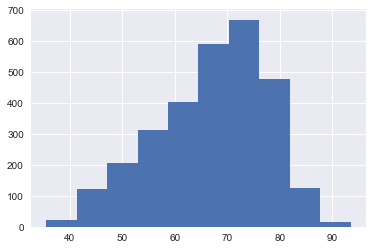

In [254]:
plt.hist(weather["Tavg_float"])

# Temperatures ~ normal distribution.  Just for example.

In [255]:
# Create filters for plotting
bulb_mask = weather["WetBulb"].notnull()
cool_mask = weather["Cool"].notnull()
heat_mask = weather["Heat"].notnull()
pressure_mask = weather["StnPressure"].notnull()
sea_mask = weather["SeaLevel"].notnull()
spd_mask = weather["AvgSpeed"].notnull()

In [256]:
# Look where the nulls are
weather[weather["WetBulb"].isnull()]

##### Impute with day before and after average #####

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Sunrise_DateTime,Sunset_DateTime,Tavg_float,Tavg_int,Normal_Temp,Depart_calc,RA,BR,TS,HZ,SN,FG,FG+,FU,DZ,VC,MI,BC,YMD
848,1,2009-06-26,86,69,78,7.0,60,NaN,0.0,13.0,0418,1931,,0,M,0.0,0.00,NaN,29.85,6.4,4,8.2,2009-06-26 04:18:00,2009-06-26 19:31:00,77.5,78,71.0,7.0,0,0,0,0,0,0,0,0,0,0,0,0,2009-06-26
2410,1,2013-08-10,81,64,73,0.0,57,NaN,0.0,8.0,0454,1900,,0,M,0.0,0.00,NaN,30.08,5.3,5,6.5,2013-08-10 04:54:00,2013-08-10 19:00:00,72.5,73,73.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,2013-08-10
2412,1,2013-08-11,81,60,71,-2.0,61,NaN,0.0,6.0,0455,1859,RA,0,M,0.0,0.01,29.35,30.07,2.0,27,3.0,2013-08-11 04:55:00,2013-08-11 18:59:00,70.5,71,73.0,-2.0,1,0,0,0,0,0,0,0,0,0,0,0,2013-08-11
2415,2,2013-08-12,85,69,77,NaN,63,NaN,0.0,12.0,0456,1858,RA,M,M,NaN,0.66,29.27,29.92,4.5,26,7.7,2013-08-12 04:56:00,2013-08-12 18:58:00,77.0,77,73.0,4.0,1,0,0,0,0,0,0,0,0,0,0,0,2013-08-12


(array([  28.,   87.,  164.,  289.,  260.,  523.,  608.,  459.,  435.,   87.]),
 array([ 32. ,  36.6,  41.2,  45.8,  50.4,  55. ,  59.6,  64.2,  68.8,
         73.4,  78. ]),
 <a list of 10 Patch objects>)

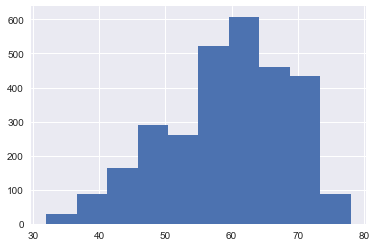

In [257]:
bulb_values = weather[bulb_mask]

plt.hist(bulb_values["WetBulb"])

# ~ Normal distribution or left skew.  Impute median?

In [258]:
##Looking at the values for Wet Bulb before and after null -- 
##missing value is just 67.0, since other station has value
weather.loc[846:851,:] 

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Sunrise_DateTime,Sunset_DateTime,Tavg_float,Tavg_int,Normal_Temp,Depart_calc,RA,BR,TS,HZ,SN,FG,FG+,FU,DZ,VC,MI,BC,YMD
846,1,2009-06-25,94,75,85,14.0,69,73.0,0.0,20.0,0417,1931,,0,M,0.0,0.000001,29.08,29.80,2.4,32,4.9,2009-06-25 04:17:00,2009-06-25 19:31:00,84.5,85,71.0,14.0,0,0,0,0,0,0,0,0,0,0,0,0,2009-06-25
847,2,2009-06-25,93,76,85,NaN,68,73.0,0.0,20.0,0417,1931,,M,M,NaN,0.000000,29.15,29.77,1.8,26,4.6,2009-06-25 04:17:00,2009-06-25 19:31:00,84.5,85,71.0,14.0,0,0,0,0,0,0,0,0,0,0,0,0,2009-06-25
848,1,2009-06-26,86,69,78,7.0,60,NaN,0.0,13.0,0418,1931,,0,M,0.0,0.000000,NaN,29.85,6.4,4,8.2,2009-06-26 04:18:00,2009-06-26 19:31:00,77.5,78,71.0,7.0,0,0,0,0,0,0,0,0,0,0,0,0,2009-06-26
849,2,2009-06-26,86,72,79,NaN,61,67.0,0.0,14.0,0418,1931,,M,M,NaN,0.000000,29.20,29.83,6.4,4,8.0,2009-06-26 04:18:00,2009-06-26 19:31:00,79.0,79,71.0,8.0,0,0,0,0,0,0,0,0,0,0,0,0,2009-06-26
850,1,2009-06-27,89,62,76,5.0,61,67.0,0.0,11.0,0418,1931,TS RA,0,M,0.0,0.300000,29.10,29.82,5.1,21,6.9,2009-06-27 04:18:00,2009-06-27 19:31:00,75.5,76,71.0,5.0,1,0,1,0,0,0,0,0,0,0,0,0,2009-06-27
851,2,2009-06-27,90,67,79,NaN,60,67.0,0.0,14.0,0418,1931,RA,M,M,NaN,0.050000,29.18,29.80,6.0,22,6.9,2009-06-27 04:18:00,2009-06-27 19:31:00,78.5,79,71.0,8.0,1,0,0,0,0,0,0,0,0,0,0,0,2009-06-27


In [259]:
##looking at other null values
weather.loc[2400:2425,:]

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Sunrise_DateTime,Sunset_DateTime,Tavg_float,Tavg_int,Normal_Temp,Depart_calc,RA,BR,TS,HZ,SN,FG,FG+,FU,DZ,VC,MI,BC,YMD
2400,1,2013-08-05,75,58,67,-6.0,59,62.0,0.0,2.0,0449,1907,RA,0,M,0.0,0.070000,29.23,29.98,6.8,19,7.6,2013-08-05 04:49:00,2013-08-05 19:07:00,66.5,67,73.0,-6.0,1,0,0,0,0,0,0,0,0,0,0,0,2013-08-05
2401,2,2013-08-05,76,63,70,NaN,56,61.0,0.0,5.0,0449,1907,,M,M,NaN,0.020000,29.29,29.98,7.1,18,7.9,2013-08-05 04:49:00,2013-08-05 19:07:00,69.5,70,73.0,-3.0,0,0,0,0,0,0,0,0,0,0,0,0,2013-08-05
2402,1,2013-08-06,83,67,75,2.0,68,70.0,0.0,10.0,0450,1906,,0,M,0.0,0.040000,29.13,29.86,7.2,21,8.0,2013-08-06 04:50:00,2013-08-06 19:06:00,75.0,75,73.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,2013-08-06
2403,2,2013-08-06,85,68,77,NaN,65,69.0,0.0,12.0,0450,1906,,M,M,NaN,0.000000,29.21,29.85,8.7,21,9.4,2013-08-06 04:50:00,2013-08-06 19:06:00,76.5,77,73.0,4.0,0,0,0,0,0,0,0,0,0,0,0,0,2013-08-06
2404,1,2013-08-07,89,67,78,5.0,68,71.0,0.0,13.0,0451,1904,,0,M,0.0,0.000001,29.14,29.83,4.0,30,9.9,2013-08-07 04:51:00,2013-08-07 19:04:00,78.0,78,73.0,5.0,0,0,0,0,0,0,0,0,0,0,0,0,2013-08-07
2405,2,2013-08-07,91,70,81,NaN,67,71.0,0.0,16.0,0451,1904,BR,M,M,NaN,0.010000,29.20,29.82,2.4,30,10.5,2013-08-07 04:51:00,2013-08-07 19:04:00,80.5,81,73.0,8.0,0,1,0,0,0,0,0,0,0,0,0,0,2013-08-07
2406,1,2013-08-08,78,65,72,-1.0,56,62.0,0.0,7.0,0452,1903,,0,M,0.0,0.000000,29.26,29.98,8.6,5,9.3,2013-08-08 04:52:00,2013-08-08 19:03:00,71.5,72,73.0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,2013-08-08
2407,2,2013-08-08,79,69,74,NaN,55,62.0,0.0,9.0,0452,1903,,M,M,NaN,0.000000,29.33,29.96,10.5,5,10.8,2013-08-08 04:52:00,2013-08-08 19:03:00,74.0,74,73.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,2013-08-08
2408,1,2013-08-09,82,59,71,-2.0,60,65.0,0.0,6.0,0453,1902,,0,M,0.0,0.000001,29.28,29.98,4.7,27,5.3,2013-08-09 04:53:00,2013-08-09 19:02:00,70.5,71,73.0,-2.0,0,0,0,0,0,0,0,0,0,0,0,0,2013-08-09
2409,2,2013-08-09,84,62,73,NaN,58,65.0,0.0,8.0,0453,1902,,M,M,NaN,0.000000,29.34,29.97,4.9,27,5.6,2013-08-09 04:53:00,2013-08-09 19:02:00,73.0,73,73.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,2013-08-09


In [260]:
weather.loc[2415,"WetBulb"] = 68.0 #takes care of Null for station 2 for single day

In [261]:
weather["WetBulb"].fillna(method='bfill', inplace=True) 
#this fills the remaining 3 null values, where Wet Bulb is missing only for station 1 (have value for s2 on same day)

In [262]:
weather.WetBulb.isnull().sum() #no more null values. Excellent

0

In [263]:
##plotting Wet Bulb over time, to see how it varies *in the 4th dimension*
#sns.tsplot(data = weather, time = "Date", values = "WetBulb")

##just realized I don't need this, but why isn't it working?

In [264]:
weather[weather["Cool"].isnull()]

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Sunrise_DateTime,Sunset_DateTime,Tavg_float,Tavg_int,Normal_Temp,Depart_calc,RA,BR,TS,HZ,SN,FG,FG+,FU,DZ,VC,MI,BC,YMD
7,2,2007-05-04,78,51,M,NaN,42,50.0,NaN,NaN,0444,1852,,M,M,NaN,0.000000,29.36,30.04,10.1,7,10.4,2007-05-04 04:44:00,2007-05-04 18:52:00,64.5,65,54.0,11.0,0,0,0,0,0,0,0,0,0,0,0,0,2007-05-04
505,2,2008-07-08,86,46,M,NaN,68,71.0,NaN,NaN,0424,1929,TS RA,M,M,NaN,0.280000,29.16,29.80,7.4,24,8.3,2008-07-08 04:24:00,2008-07-08 19:29:00,66.0,66,73.0,-7.0,1,0,1,0,0,0,0,0,0,0,0,0,2008-07-08
675,2,2008-10-01,62,46,M,NaN,41,47.0,NaN,NaN,0548,1734,,M,M,NaN,0.000000,29.30,29.96,10.9,33,11.0,2008-10-01 05:48:00,2008-10-01 17:34:00,54.0,54,58.0,-4.0,0,0,0,0,0,0,0,0,0,0,0,0,2008-10-01
1637,2,2011-07-22,100,71,M,NaN,70,74.0,NaN,NaN,0435,1921,TS TSRA BR,M,M,NaN,0.140000,29.23,29.86,3.8,10,8.2,2011-07-22 04:35:00,2011-07-22 19:21:00,85.5,86,74.0,12.0,1,1,1,0,0,0,0,0,0,0,0,0,2011-07-22
2067,2,2012-08-22,84,72,M,NaN,51,61.0,NaN,NaN,0506,1843,,M,M,NaN,0.000000,29.39,NaN,4.7,19,NaN,2012-08-22 05:06:00,2012-08-22 18:43:00,78.0,78,71.0,7.0,0,0,0,0,0,0,0,0,0,0,0,0,2012-08-22
2211,2,2013-05-02,71,42,M,NaN,39,45.0,NaN,NaN,0447,1850,,M,M,NaN,0.000000,29.51,30.17,15.8,2,16.1,2013-05-02 04:47:00,2013-05-02 18:50:00,56.5,57,54.0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,2013-05-02
2501,2,2013-09-24,91,52,M,NaN,48,54.0,NaN,NaN,0541,1746,,M,M,NaN,0.000000,29.33,30.00,5.8,9,7.7,2013-09-24 05:41:00,2013-09-24 17:46:00,71.5,72,61.0,11.0,0,0,0,0,0,0,0,0,0,0,0,0,2013-09-24
2511,2,2013-09-29,84,53,M,NaN,48,54.0,NaN,NaN,0546,1737,RA BR,M,M,NaN,0.220000,29.36,30.01,6.3,36,7.8,2013-09-29 05:46:00,2013-09-29 17:37:00,68.5,69,59.0,10.0,1,1,0,0,0,0,0,0,0,0,0,0,2013-09-29
2525,2,2013-10-06,76,48,M,NaN,44,50.0,NaN,NaN,0554,1725,RA DZ BR,M,M,NaN,0.060000,29.10,29.76,10.1,25,10.6,2013-10-06 05:54:00,2013-10-06 17:25:00,62.0,62,56.0,6.0,1,1,0,0,0,0,0,0,1,0,0,0,2013-10-06
2579,2,2014-05-02,80,47,M,NaN,43,47.0,NaN,NaN,0447,1850,RA,M,M,NaN,0.040000,29.10,29.79,10.7,23,11.9,2014-05-02 04:47:00,2014-05-02 18:50:00,63.5,64,54.0,10.0,1,0,0,0,0,0,0,0,0,0,0,0,2014-05-02


(array([ 1329.,   319.,   351.,   317.,   317.,   187.,    71.,    29.,
           10.,     3.]),
 array([  0. ,   2.9,   5.8,   8.7,  11.6,  14.5,  17.4,  20.3,  23.2,
         26.1,  29. ]),
 <a list of 10 Patch objects>)

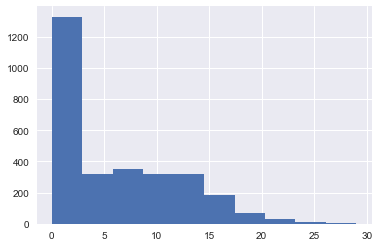

In [265]:
cool_values = weather[cool_mask]

plt.hist(cool_values["Cool"])

# Right skew.  Add a low value?

In [266]:
# Heat, Cool:  Calculated vs. 65 degree temperature.  Unsure if useful.  Also have missing "M"

In [267]:
weather.Tavg.isnull().sum()

0

In [268]:
weather[weather.Tavg == "M"]

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Sunrise_DateTime,Sunset_DateTime,Tavg_float,Tavg_int,Normal_Temp,Depart_calc,RA,BR,TS,HZ,SN,FG,FG+,FU,DZ,VC,MI,BC,YMD
7,2,2007-05-04,78,51,M,NaN,42,50.0,NaN,NaN,0444,1852,,M,M,NaN,0.000000,29.36,30.04,10.1,7,10.4,2007-05-04 04:44:00,2007-05-04 18:52:00,64.5,65,54.0,11.0,0,0,0,0,0,0,0,0,0,0,0,0,2007-05-04
505,2,2008-07-08,86,46,M,NaN,68,71.0,NaN,NaN,0424,1929,TS RA,M,M,NaN,0.280000,29.16,29.80,7.4,24,8.3,2008-07-08 04:24:00,2008-07-08 19:29:00,66.0,66,73.0,-7.0,1,0,1,0,0,0,0,0,0,0,0,0,2008-07-08
675,2,2008-10-01,62,46,M,NaN,41,47.0,NaN,NaN,0548,1734,,M,M,NaN,0.000000,29.30,29.96,10.9,33,11.0,2008-10-01 05:48:00,2008-10-01 17:34:00,54.0,54,58.0,-4.0,0,0,0,0,0,0,0,0,0,0,0,0,2008-10-01
1637,2,2011-07-22,100,71,M,NaN,70,74.0,NaN,NaN,0435,1921,TS TSRA BR,M,M,NaN,0.140000,29.23,29.86,3.8,10,8.2,2011-07-22 04:35:00,2011-07-22 19:21:00,85.5,86,74.0,12.0,1,1,1,0,0,0,0,0,0,0,0,0,2011-07-22
2067,2,2012-08-22,84,72,M,NaN,51,61.0,NaN,NaN,0506,1843,,M,M,NaN,0.000000,29.39,NaN,4.7,19,NaN,2012-08-22 05:06:00,2012-08-22 18:43:00,78.0,78,71.0,7.0,0,0,0,0,0,0,0,0,0,0,0,0,2012-08-22
2211,2,2013-05-02,71,42,M,NaN,39,45.0,NaN,NaN,0447,1850,,M,M,NaN,0.000000,29.51,30.17,15.8,2,16.1,2013-05-02 04:47:00,2013-05-02 18:50:00,56.5,57,54.0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,2013-05-02
2501,2,2013-09-24,91,52,M,NaN,48,54.0,NaN,NaN,0541,1746,,M,M,NaN,0.000000,29.33,30.00,5.8,9,7.7,2013-09-24 05:41:00,2013-09-24 17:46:00,71.5,72,61.0,11.0,0,0,0,0,0,0,0,0,0,0,0,0,2013-09-24
2511,2,2013-09-29,84,53,M,NaN,48,54.0,NaN,NaN,0546,1737,RA BR,M,M,NaN,0.220000,29.36,30.01,6.3,36,7.8,2013-09-29 05:46:00,2013-09-29 17:37:00,68.5,69,59.0,10.0,1,1,0,0,0,0,0,0,0,0,0,0,2013-09-29
2525,2,2013-10-06,76,48,M,NaN,44,50.0,NaN,NaN,0554,1725,RA DZ BR,M,M,NaN,0.060000,29.10,29.76,10.1,25,10.6,2013-10-06 05:54:00,2013-10-06 17:25:00,62.0,62,56.0,6.0,1,1,0,0,0,0,0,0,1,0,0,0,2013-10-06
2579,2,2014-05-02,80,47,M,NaN,43,47.0,NaN,NaN,0447,1850,RA,M,M,NaN,0.040000,29.10,29.79,10.7,23,11.9,2014-05-02 04:47:00,2014-05-02 18:50:00,63.5,64,54.0,10.0,1,0,0,0,0,0,0,0,0,0,0,0,2014-05-02


In [269]:
weather.head(15)

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Sunrise_DateTime,Sunset_DateTime,Tavg_float,Tavg_int,Normal_Temp,Depart_calc,RA,BR,TS,HZ,SN,FG,FG+,FU,DZ,VC,MI,BC,YMD
0,1,2007-05-01,83,50,67,14.0,51,56.0,0.0,2.0,0448,1849,,0,M,0.0,0.000000,29.10,29.82,1.7,27,9.2,2007-05-01 04:48:00,2007-05-01 18:49:00,66.5,67,53.0,14.0,0,0,0,0,0,0,0,0,0,0,0,0,2007-05-01
1,2,2007-05-01,84,52,68,NaN,51,57.0,0.0,3.0,0448,1849,,M,M,NaN,0.000000,29.18,29.82,2.7,25,9.6,2007-05-01 04:48:00,2007-05-01 18:49:00,68.0,68,53.0,15.0,0,0,0,0,0,0,0,0,0,0,0,0,2007-05-01
2,1,2007-05-02,59,42,51,-3.0,42,47.0,14.0,0.0,0447,1850,BR,0,M,0.0,0.000000,29.38,30.09,13.0,4,13.4,2007-05-02 04:47:00,2007-05-02 18:50:00,50.5,51,54.0,-3.0,0,1,0,0,0,0,0,0,0,0,0,0,2007-05-02
3,2,2007-05-02,60,43,52,NaN,42,47.0,13.0,0.0,0447,1850,BR HZ,M,M,NaN,0.000000,29.44,30.08,13.3,2,13.4,2007-05-02 04:47:00,2007-05-02 18:50:00,51.5,52,54.0,-2.0,0,1,0,1,0,0,0,0,0,0,0,0,2007-05-02
4,1,2007-05-03,66,46,56,2.0,40,48.0,9.0,0.0,0446,1851,,0,M,0.0,0.000000,29.39,30.12,11.7,7,11.9,2007-05-03 04:46:00,2007-05-03 18:51:00,56.0,56,54.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,2007-05-03
5,2,2007-05-03,67,48,58,NaN,40,50.0,7.0,0.0,0446,1851,HZ,M,M,NaN,0.000000,29.46,30.12,12.9,6,13.2,2007-05-03 04:46:00,2007-05-03 18:51:00,57.5,58,54.0,4.0,0,0,0,1,0,0,0,0,0,0,0,0,2007-05-03
6,1,2007-05-04,66,49,58,4.0,41,50.0,7.0,0.0,0444,1852,RA,0,M,0.0,0.000001,29.31,30.05,10.4,8,10.8,2007-05-04 04:44:00,2007-05-04 18:52:00,57.5,58,54.0,4.0,1,0,0,0,0,0,0,0,0,0,0,0,2007-05-04
7,2,2007-05-04,78,51,M,NaN,42,50.0,NaN,NaN,0444,1852,,M,M,NaN,0.000000,29.36,30.04,10.1,7,10.4,2007-05-04 04:44:00,2007-05-04 18:52:00,64.5,65,54.0,11.0,0,0,0,0,0,0,0,0,0,0,0,0,2007-05-04
8,1,2007-05-05,66,53,60,5.0,38,49.0,5.0,0.0,0443,1853,,0,M,0.0,0.000001,29.40,30.10,11.7,7,12.0,2007-05-05 04:43:00,2007-05-05 18:53:00,59.5,60,55.0,5.0,0,0,0,0,0,0,0,0,0,0,0,0,2007-05-05
9,2,2007-05-05,66,54,60,NaN,39,50.0,5.0,0.0,0443,1853,,M,M,NaN,0.000001,29.46,30.09,11.2,7,11.5,2007-05-05 04:43:00,2007-05-05 18:53:00,60.0,60,55.0,5.0,0,0,0,0,0,0,0,0,0,0,0,0,2007-05-05


In [270]:
## Heat/Cool is float
##Heat = 0 if Tavg >= 65, = 65- Tavg if Tavg < 65
##Cool = 0 if Tavg <= 65, = Tavg - 65 if Tavg > 65

#how do I turn this into a function?

def fix_the_radiator(avgtemp):
    if avgtemp >= 65:
        heatindex = 65.0 - avgtemp
        #coolindex = 0.0
    if avgtemp < 65:
        heatindex = 0
        #coolindex = avgtemp - 65.0
    return heatindex #, coolindex

In [271]:
def fix_the_ac(avgtemp):
    if avgtemp >= 65:
        #heatindex = 65.0 - avgtemp
        coolindex = 0.0
    if avgtemp < 65:
        #heatindex = 0
        coolindex = avgtemp - 65.0
    return coolindex

In [272]:
weather["Heat"] = weather.apply(lambda row: fix_the_radiator(row["Tavg_float"]), axis = 1)

In [273]:
weather["Cool"] = weather.apply(lambda row: fix_the_radiator(row["Tavg_float"]), axis = 1)

In [274]:
weather[weather["Heat"].isnull()]

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Sunrise_DateTime,Sunset_DateTime,Tavg_float,Tavg_int,Normal_Temp,Depart_calc,RA,BR,TS,HZ,SN,FG,FG+,FU,DZ,VC,MI,BC,YMD


In [275]:
weather[weather["Cool"].isnull()]

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Sunrise_DateTime,Sunset_DateTime,Tavg_float,Tavg_int,Normal_Temp,Depart_calc,RA,BR,TS,HZ,SN,FG,FG+,FU,DZ,VC,MI,BC,YMD


(array([    4.,    10.,    31.,    68.,   187.,   317.,   264.,   352.,
          328.,  1372.]),
 array([-28.5 , -25.65, -22.8 , -19.95, -17.1 , -14.25, -11.4 ,  -8.55,
         -5.7 ,  -2.85,   0.  ]),
 <a list of 10 Patch objects>)

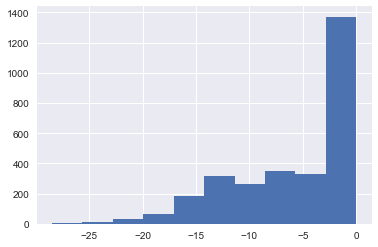

In [276]:
heat_values = weather[heat_mask]

plt.hist(heat_values["Heat"])

# Right skew.  Add another low value?  Median?

In [277]:
weather[weather["StnPressure"].isnull()]

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Sunrise_DateTime,Sunset_DateTime,Tavg_float,Tavg_int,Normal_Temp,Depart_calc,RA,BR,TS,HZ,SN,FG,FG+,FU,DZ,VC,MI,BC,YMD
87,2,2007-06-13,86,68,77,NaN,53,62.0,-12.0,-12.0,0416,1927,,M,M,NaN,0.0,NaN,NaN,7.0,5,NaN,2007-06-13 04:16:00,2007-06-13 19:27:00,77.0,77,68.0,9.0,0,0,0,0,0,0,0,0,0,0,0,0,2007-06-13
848,1,2009-06-26,86,69,78,7.0,60,67.0,-12.5,-12.5,0418,1931,,0,M,0.0,0.0,NaN,29.85,6.4,4,8.2,2009-06-26 04:18:00,2009-06-26 19:31:00,77.5,78,71.0,7.0,0,0,0,0,0,0,0,0,0,0,0,0,2009-06-26
2410,1,2013-08-10,81,64,73,0.0,57,63.0,-7.5,-7.5,0454,1900,,0,M,0.0,0.0,NaN,30.08,5.3,5,6.5,2013-08-10 04:54:00,2013-08-10 19:00:00,72.5,73,73.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,2013-08-10
2411,2,2013-08-10,81,68,75,NaN,55,63.0,-9.5,-9.5,0454,1900,,M,M,NaN,0.0,NaN,30.07,6.0,6,7.4,2013-08-10 04:54:00,2013-08-10 19:00:00,74.5,75,73.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,2013-08-10


In [278]:
weather.loc[87,"StnPressure"] = weather.loc[86, "StnPressure"] + 0.05
#atmospheric pressure differs between stations by about 0.05

In [279]:
weather.loc[87,"StnPressure"] 

29.41

In [280]:
weather.loc[848, "StnPressure"] = weather.loc[849, "StnPressure"] - 0.07

In [281]:
weather.loc[848, "StnPressure"]

29.129999999999999

In [282]:
weather.loc[2410, "StnPressure"] = weather.loc[2408, "StnPressure"] + 0.03

In [283]:
weather.loc[2411, "StnPressure"] = weather.loc[2410, "StnPressure"] + 0.07

In [284]:
weather.StnPressure.isnull().sum()

0

(array([    4.,    16.,    44.,   183.,   574.,  1000.,   754.,   296.,
           67.,     2.]),
 array([ 28.55 ,  28.681,  28.812,  28.943,  29.074,  29.205,  29.336,
         29.467,  29.598,  29.729,  29.86 ]),
 <a list of 10 Patch objects>)

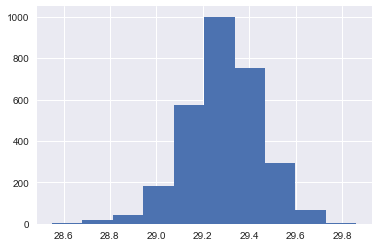

In [285]:
pressure_values = weather[pressure_mask]

plt.hist(pressure_values["StnPressure"])

# Normal distribution.  Take the mean.

In [286]:
weather[weather["SeaLevel"].isnull()]

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Sunrise_DateTime,Sunset_DateTime,Tavg_float,Tavg_int,Normal_Temp,Depart_calc,RA,BR,TS,HZ,SN,FG,FG+,FU,DZ,VC,MI,BC,YMD
87,2,2007-06-13,86,68,77,NaN,53,62.0,-12.0,-12.0,0416,1927,,M,M,NaN,0.000000,29.41,NaN,7.0,5,NaN,2007-06-13 04:16:00,2007-06-13 19:27:00,77.0,77,68.0,9.0,0,0,0,0,0,0,0,0,0,0,0,0,2007-06-13
832,1,2009-06-18,80,61,71,1.0,63,67.0,-5.5,-5.5,0416,1929,RA BR,0,M,0.0,0.120000,29.08,NaN,6.7,16,7.9,2009-06-18 04:16:00,2009-06-18 19:29:00,70.5,71,70.0,1.0,1,1,0,0,0,0,0,0,0,0,0,0,2009-06-18
994,1,2009-09-07,77,59,68,1.0,59,62.0,-3.0,-3.0,0523,1817,BR,0,M,0.0,0.000000,29.39,NaN,5.8,3,4.0,2009-09-07 05:23:00,2009-09-07 18:17:00,68.0,68,67.0,1.0,0,1,0,0,0,0,0,0,0,0,0,0,2009-09-07
1732,1,2011-09-08,75,57,66,0.0,53,59.0,-1.0,-1.0,0524,1815,RA,0,M,0.0,0.000001,29.34,NaN,13.0,2,13.4,2011-09-08 05:24:00,2011-09-08 18:15:00,66.0,66,66.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,2011-09-08
1745,2,2011-09-14,60,48,54,NaN,45,51.0,0.0,0.0,0530,1805,RA BR HZ FU,M,M,NaN,0.000001,29.47,NaN,6.0,32,NaN,2011-09-14 05:30:00,2011-09-14 18:05:00,54.0,54,64.0,-10.0,1,1,0,1,0,0,0,1,0,0,0,0,2011-09-14
1756,1,2011-09-20,74,49,62,0.0,54,58.0,0.0,0.0,0537,1753,MIFG BCFG BR,0,M,0.0,0.000000,29.26,NaN,7.3,18,7.3,2011-09-20 05:37:00,2011-09-20 17:53:00,61.5,62,62.0,0.0,0,1,0,0,0,1,0,0,0,0,1,1,2011-09-20
2067,2,2012-08-22,84,72,M,NaN,51,61.0,-13.0,-13.0,0506,1843,,M,M,NaN,0.000000,29.39,NaN,4.7,19,NaN,2012-08-22 05:06:00,2012-08-22 18:43:00,78.0,78,71.0,7.0,0,0,0,0,0,0,0,0,0,0,0,0,2012-08-22
2090,1,2012-09-03,88,71,80,12.0,70,73.0,-14.5,-14.5,0519,1824,BR,0,M,0.0,0.000000,29.17,NaN,4.6,6,4.4,2012-09-03 05:19:00,2012-09-03 18:24:00,79.5,80,68.0,12.0,0,1,0,0,0,0,0,0,0,0,0,0,2012-09-03
2743,2,2014-07-23,76,64,70,NaN,56,61.0,-5.0,-5.0,0436,1920,,M,M,NaN,0.000000,29.47,NaN,16.4,2,16.7,2014-07-23 04:36:00,2014-07-23 19:20:00,70.0,70,74.0,-4.0,0,0,0,0,0,0,0,0,0,0,0,0,2014-07-23


In [287]:
weather.loc[2736:2749,:]

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Sunrise_DateTime,Sunset_DateTime,Tavg_float,Tavg_int,Normal_Temp,Depart_calc,RA,BR,TS,HZ,SN,FG,FG+,FU,DZ,VC,MI,BC,YMD
2736,1,2014-07-20,82,60,71,-3.0,56,63.0,-6.0,-6.0,0433,1923,,0,M,0.0,0.000000,29.31,30.03,4.0,22,4.5,2014-07-20 04:33:00,2014-07-20 19:23:00,71.0,71,74.0,-3.0,0,0,0,0,0,0,0,0,0,0,0,0,2014-07-20
2737,2,2014-07-20,84,66,75,NaN,59,65.0,-10.0,-10.0,0433,1923,,M,M,NaN,0.000000,29.37,30.01,3.8,23,4.4,2014-07-20 04:33:00,2014-07-20 19:23:00,75.0,75,74.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,2014-07-20
2738,1,2014-07-21,86,63,75,1.0,61,66.0,-9.5,-9.5,0434,1922,,0,M,0.0,0.000000,29.34,30.05,6.9,20,7.2,2014-07-21 04:34:00,2014-07-21 19:22:00,74.5,75,74.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,2014-07-21
2739,2,2014-07-21,87,68,78,NaN,63,69.0,-12.5,-12.5,0434,1922,,M,M,NaN,0.000000,29.41,30.04,7.6,19,8.0,2014-07-21 04:34:00,2014-07-21 19:22:00,77.5,78,74.0,4.0,0,0,0,0,0,0,0,0,0,0,0,0,2014-07-21
2740,1,2014-07-22,90,69,80,6.0,67,71.0,-14.5,-14.5,0435,1921,TS,0,M,0.0,0.010000,29.27,29.97,8.3,22,11.9,2014-07-22 04:35:00,2014-07-22 19:21:00,79.5,80,74.0,6.0,0,0,1,0,0,0,0,0,0,0,0,0,2014-07-22
2741,2,2014-07-22,91,72,82,NaN,70,74.0,-16.5,-16.5,0435,1921,TSRA BR,M,M,NaN,0.190000,29.34,29.96,9.6,21,12.9,2014-07-22 04:35:00,2014-07-22 19:21:00,81.5,82,74.0,8.0,1,1,1,0,0,0,0,0,0,0,0,0,2014-07-22
2742,1,2014-07-23,75,59,67,-7.0,51,58.0,-2.0,-2.0,0436,1920,,0,M,0.0,0.000000,29.41,30.12,15.7,2,16.1,2014-07-23 04:36:00,2014-07-23 19:20:00,67.0,67,74.0,-7.0,0,0,0,0,0,0,0,0,0,0,0,0,2014-07-23
2743,2,2014-07-23,76,64,70,NaN,56,61.0,-5.0,-5.0,0436,1920,,M,M,NaN,0.000000,29.47,NaN,16.4,2,16.7,2014-07-23 04:36:00,2014-07-23 19:20:00,70.0,70,74.0,-4.0,0,0,0,0,0,0,0,0,0,0,0,0,2014-07-23
2744,1,2014-07-24,75,57,66,-8.0,47,56.0,-1.0,-1.0,0437,1919,,0,M,0.0,0.000000,29.39,30.11,6.2,5,8.8,2014-07-24 04:37:00,2014-07-24 19:19:00,66.0,66,74.0,-8.0,0,0,0,0,0,0,0,0,0,0,0,0,2014-07-24
2745,2,2014-07-24,75,60,68,NaN,52,59.0,-2.5,-2.5,0437,1919,,M,M,NaN,0.000000,29.44,30.10,5.0,4,8.2,2014-07-24 04:37:00,2014-07-24 19:19:00,67.5,68,74.0,-6.0,0,0,0,0,0,0,0,0,0,0,0,0,2014-07-24


In [288]:
weather.loc[87, "SeaLevel"] = weather.loc[86, "SeaLevel"] - 0.02

In [289]:
weather.loc[832, "SeaLevel"] = weather.loc[833, "SeaLevel"] + 0.02

In [290]:
weather.loc[994, "SeaLevel"] = weather.loc[995, "SeaLevel"] + 0.02

In [291]:
weather.loc[1732, "SeaLevel"] = weather.loc[1733, "SeaLevel"] + 0.02

In [292]:
weather.loc[1745, "SeaLevel"] = weather.loc[1744, "SeaLevel"] + 0.01

In [293]:
weather.loc[1756, "SeaLevel"] = weather.loc[1757, "SeaLevel"]

In [294]:
weather.loc[2067, "SeaLevel"] = weather.loc[2066, "SeaLevel"] - 0.01

In [295]:
weather.loc[2090, "SeaLevel"] = weather.loc[2091, "SeaLevel"] + 0.02

In [296]:
weather.loc[2743, "SeaLevel"] = weather.loc[2742, "SeaLevel"] - 0.01

In [297]:
weather.SeaLevel.isnull().sum()

0

(array([   4.,   10.,   46.,  162.,  588.,  953.,  785.,  289.,   95.,    3.]),
 array([ 29.23,  29.36,  29.49,  29.62,  29.75,  29.88,  30.01,  30.14,
         30.27,  30.4 ,  30.53]),
 <a list of 10 Patch objects>)

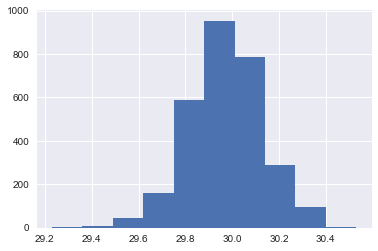

In [298]:
sea_level_values = weather[sea_mask]

plt.hist(sea_level_values["SeaLevel"])

# Normal distribution.  Take the mean.

In [299]:
weather[weather["AvgSpeed"].isnull()]

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Sunrise_DateTime,Sunset_DateTime,Tavg_float,Tavg_int,Normal_Temp,Depart_calc,RA,BR,TS,HZ,SN,FG,FG+,FU,DZ,VC,MI,BC,YMD
87,2,2007-06-13,86,68,77,NaN,53,62.0,-12.0,-12.0,0416,1927,,M,M,NaN,0.000000,29.41,30.07,7.0,5,NaN,2007-06-13 04:16:00,2007-06-13 19:27:00,77.0,77,68.0,9.0,0,0,0,0,0,0,0,0,0,0,0,0,2007-06-13
1745,2,2011-09-14,60,48,54,NaN,45,51.0,0.0,0.0,0530,1805,RA BR HZ FU,M,M,NaN,0.000001,29.47,30.10,6.0,32,NaN,2011-09-14 05:30:00,2011-09-14 18:05:00,54.0,54,64.0,-10.0,1,1,0,1,0,0,0,1,0,0,0,0,2011-09-14
2067,2,2012-08-22,84,72,M,NaN,51,61.0,-13.0,-13.0,0506,1843,,M,M,NaN,0.000000,29.39,30.06,4.7,19,NaN,2012-08-22 05:06:00,2012-08-22 18:43:00,78.0,78,71.0,7.0,0,0,0,0,0,0,0,0,0,0,0,0,2012-08-22


In [300]:
#weather.loc[80:94,:] # I don't see a logical pattern to filling the AvgSpeed, aside from ffill 
#(no pattern to discrepancy between avg speed for stations 1 and 2)

In [301]:
weather["AvgSpeed"].fillna(method='ffill', inplace=True) 

(array([ 113.,  760.,  924.,  675.,  293.,  122.,   38.,    7.,    8.,    1.]),
 array([  1.7 ,   4.16,   6.62,   9.08,  11.54,  14.  ,  16.46,  18.92,
         21.38,  23.84,  26.3 ]),
 <a list of 10 Patch objects>)

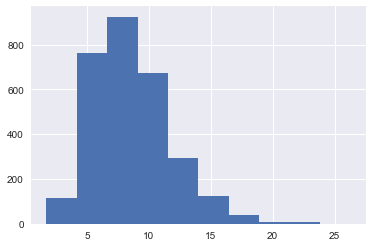

In [302]:
spd_values = weather[spd_mask]

plt.hist(spd_values["AvgSpeed"])

# ~ Right skew.  Take the median?

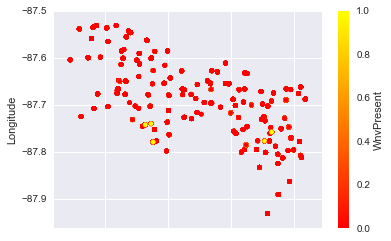

In [303]:
train.plot(kind = "scatter", x = "Latitude", y = "Longitude", c = "WnvPresent", colormap = "autumn")
##looking at geographic spread of whether or not wnv present
##NB: plot technically extends toward us (along z axis), because each visible point is really
##a bunch of overlaid points at the same geographic location as recorded at different points in time


In [304]:
##Check out CodeSum value counts to see if any missing 

In [305]:
weather.isnull().sum()

Station                0
Date                   0
Tmax                   0
Tmin                   0
Tavg                   0
Depart              1472
DewPoint               0
WetBulb                0
Heat                   0
Cool                   0
Sunrise                0
Sunset                 0
CodeSum                0
Depth                  0
Water1                 0
SnowFall            1472
PrecipTotal            2
StnPressure            0
SeaLevel               0
ResultSpeed            0
ResultDir              0
AvgSpeed               0
Sunrise_DateTime       0
Sunset_DateTime        0
Tavg_float             0
Tavg_int               0
Normal_Temp            0
Depart_calc            0
RA                     0
BR                     0
TS                     0
HZ                     0
SN                     0
FG                     0
FG+                    0
FU                     0
DZ                     0
VC                     0
MI                     0
BC                     0


In [306]:
##I went back and changed the "bfill" for pd.fillna to "ffill" -- if we're replacing station 2 values with 
##station 1's given values we need to forward fill

In [307]:
weather.SnowFall.value_counts() # this is the values for station 1, station 2 is all NaNs. We should drop

0.000000    1459
0.000001      12
0.100000       1
Name: SnowFall, dtype: int64

In [308]:
#just for cleanliness' sake, front-filling SnowFall in weather df (before most likely dropping col altogether)

In [309]:
weather["SnowFall"].fillna(method='ffill', inplace=True)

In [310]:
weather.Depart.value_counts()

 2.0     93
-1.0     84
-2.0     80
 5.0     77
 7.0     76
 1.0     76
 3.0     75
 0.0     74
-3.0     72
 4.0     71
 6.0     67
 8.0     59
-5.0     57
-4.0     56
-6.0     50
 9.0     47
 10.0    46
-8.0     43
-7.0     30
 11.0    28
 12.0    28
-9.0     25
 13.0    23
 14.0    22
-10.0    22
 15.0    15
 16.0    12
-11.0    10
-12.0     8
 17.0     7
-14.0     6
 18.0     6
-13.0     5
 20.0     4
 19.0     4
-16.0     3
 22.0     3
-15.0     3
 21.0     2
-17.0     2
 23.0     1
Name: Depart, dtype: int64

In [311]:
weather.head(10)

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Sunrise_DateTime,Sunset_DateTime,Tavg_float,Tavg_int,Normal_Temp,Depart_calc,RA,BR,TS,HZ,SN,FG,FG+,FU,DZ,VC,MI,BC,YMD
0,1,2007-05-01,83,50,67,14.0,51,56.0,-1.5,-1.5,0448,1849,,0,M,0.0,0.000000,29.10,29.82,1.7,27,9.2,2007-05-01 04:48:00,2007-05-01 18:49:00,66.5,67,53.0,14.0,0,0,0,0,0,0,0,0,0,0,0,0,2007-05-01
1,2,2007-05-01,84,52,68,NaN,51,57.0,-3.0,-3.0,0448,1849,,M,M,0.0,0.000000,29.18,29.82,2.7,25,9.6,2007-05-01 04:48:00,2007-05-01 18:49:00,68.0,68,53.0,15.0,0,0,0,0,0,0,0,0,0,0,0,0,2007-05-01
2,1,2007-05-02,59,42,51,-3.0,42,47.0,0.0,0.0,0447,1850,BR,0,M,0.0,0.000000,29.38,30.09,13.0,4,13.4,2007-05-02 04:47:00,2007-05-02 18:50:00,50.5,51,54.0,-3.0,0,1,0,0,0,0,0,0,0,0,0,0,2007-05-02
3,2,2007-05-02,60,43,52,NaN,42,47.0,0.0,0.0,0447,1850,BR HZ,M,M,0.0,0.000000,29.44,30.08,13.3,2,13.4,2007-05-02 04:47:00,2007-05-02 18:50:00,51.5,52,54.0,-2.0,0,1,0,1,0,0,0,0,0,0,0,0,2007-05-02
4,1,2007-05-03,66,46,56,2.0,40,48.0,0.0,0.0,0446,1851,,0,M,0.0,0.000000,29.39,30.12,11.7,7,11.9,2007-05-03 04:46:00,2007-05-03 18:51:00,56.0,56,54.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,2007-05-03
5,2,2007-05-03,67,48,58,NaN,40,50.0,0.0,0.0,0446,1851,HZ,M,M,0.0,0.000000,29.46,30.12,12.9,6,13.2,2007-05-03 04:46:00,2007-05-03 18:51:00,57.5,58,54.0,4.0,0,0,0,1,0,0,0,0,0,0,0,0,2007-05-03
6,1,2007-05-04,66,49,58,4.0,41,50.0,0.0,0.0,0444,1852,RA,0,M,0.0,0.000001,29.31,30.05,10.4,8,10.8,2007-05-04 04:44:00,2007-05-04 18:52:00,57.5,58,54.0,4.0,1,0,0,0,0,0,0,0,0,0,0,0,2007-05-04
7,2,2007-05-04,78,51,M,NaN,42,50.0,0.0,0.0,0444,1852,,M,M,0.0,0.000000,29.36,30.04,10.1,7,10.4,2007-05-04 04:44:00,2007-05-04 18:52:00,64.5,65,54.0,11.0,0,0,0,0,0,0,0,0,0,0,0,0,2007-05-04
8,1,2007-05-05,66,53,60,5.0,38,49.0,0.0,0.0,0443,1853,,0,M,0.0,0.000001,29.40,30.10,11.7,7,12.0,2007-05-05 04:43:00,2007-05-05 18:53:00,59.5,60,55.0,5.0,0,0,0,0,0,0,0,0,0,0,0,0,2007-05-05
9,2,2007-05-05,66,54,60,NaN,39,50.0,0.0,0.0,0443,1853,,M,M,0.0,0.000001,29.46,30.09,11.2,7,11.5,2007-05-05 04:43:00,2007-05-05 18:53:00,60.0,60,55.0,5.0,0,0,0,0,0,0,0,0,0,0,0,0,2007-05-05


In [312]:
weather[weather.Heat.isnull()]

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Sunrise_DateTime,Sunset_DateTime,Tavg_float,Tavg_int,Normal_Temp,Depart_calc,RA,BR,TS,HZ,SN,FG,FG+,FU,DZ,VC,MI,BC,YMD


In [313]:
weather[weather.PrecipTotal.isnull()]

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Sunrise_DateTime,Sunset_DateTime,Tavg_float,Tavg_int,Normal_Temp,Depart_calc,RA,BR,TS,HZ,SN,FG,FG+,FU,DZ,VC,MI,BC,YMD
117,2,2007-06-28,73,61,67,NaN,56,61.0,-2.0,-2.0,0419,1931,,M,M,0.0,NaN,29.43,30.07,12.2,2,13.3,2007-06-28 04:19:00,2007-06-28 19:31:00,67.0,67,71.0,-4.0,0,0,0,0,0,0,0,0,0,0,0,0,2007-06-28
119,2,2007-06-29,71,56,64,NaN,56,60.0,0.0,0.0,0419,1931,,M,M,0.0,NaN,29.47,30.11,7.4,2,8.2,2007-06-29 04:19:00,2007-06-29 19:31:00,63.5,64,71.0,-7.0,0,0,0,0,0,0,0,0,0,0,0,0,2007-06-29


In [314]:
weather.loc[114:124,:]

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Sunrise_DateTime,Sunset_DateTime,Tavg_float,Tavg_int,Normal_Temp,Depart_calc,RA,BR,TS,HZ,SN,FG,FG+,FU,DZ,VC,MI,BC,YMD
114,1,2007-06-27,91,71,81,10.0,70,72.0,-16.0,-16.0,0418,1931,TSRA,0,M,0.0,0.15,29.29,30.02,7.5,24,8.8,2007-06-27 04:18:00,2007-06-27 19:31:00,81.0,81,71.0,10.0,1,0,1,0,0,0,0,0,0,0,0,0,2007-06-27
115,2,2007-06-27,89,71,80,NaN,69,72.0,-15.0,-15.0,0418,1931,TSRA RA BR,M,M,0.0,0.35,29.36,30.00,7.9,24,8.5,2007-06-27 04:18:00,2007-06-27 19:31:00,80.0,80,71.0,9.0,1,1,1,0,0,0,0,0,0,0,0,0,2007-06-27
116,1,2007-06-28,74,58,66,-5.0,55,60.0,-1.0,-1.0,0419,1931,,0,M,0.0,0.00,29.41,30.09,11.9,3,12.5,2007-06-28 04:19:00,2007-06-28 19:31:00,66.0,66,71.0,-5.0,0,0,0,0,0,0,0,0,0,0,0,0,2007-06-28
117,2,2007-06-28,73,61,67,NaN,56,61.0,-2.0,-2.0,0419,1931,,M,M,0.0,NaN,29.43,30.07,12.2,2,13.3,2007-06-28 04:19:00,2007-06-28 19:31:00,67.0,67,71.0,-4.0,0,0,0,0,0,0,0,0,0,0,0,0,2007-06-28
118,1,2007-06-29,70,56,63,-8.0,55,59.0,0.0,0.0,0419,1931,,0,M,0.0,0.00,29.41,30.13,7.6,2,8.3,2007-06-29 04:19:00,2007-06-29 19:31:00,63.0,63,71.0,-8.0,0,0,0,0,0,0,0,0,0,0,0,0,2007-06-29
119,2,2007-06-29,71,56,64,NaN,56,60.0,0.0,0.0,0419,1931,,M,M,0.0,NaN,29.47,30.11,7.4,2,8.2,2007-06-29 04:19:00,2007-06-29 19:31:00,63.5,64,71.0,-7.0,0,0,0,0,0,0,0,0,0,0,0,0,2007-06-29
120,1,2007-06-30,79,54,67,-5.0,46,56.0,-1.5,-1.5,0419,1931,,0,M,0.0,0.00,29.41,30.13,4.9,3,5.8,2007-06-30 04:19:00,2007-06-30 19:31:00,66.5,67,72.0,-5.0,0,0,0,0,0,0,0,0,0,0,0,0,2007-06-30
121,2,2007-06-30,77,58,68,NaN,49,58.0,-2.5,-2.5,0419,1931,,M,M,0.0,0.00,29.46,30.11,5.1,4,6.2,2007-06-30 04:19:00,2007-06-30 19:31:00,67.5,68,72.0,-4.0,0,0,0,0,0,0,0,0,0,0,0,0,2007-06-30
122,1,2007-07-01,75,54,65,-7.0,52,58.0,0.0,0.0,0420,1931,,0,M,0.0,0.00,29.51,30.23,8.6,4,8.6,2007-07-01 04:20:00,2007-07-01 19:31:00,64.5,65,72.0,-7.0,0,0,0,0,0,0,0,0,0,0,0,0,2007-07-01
123,2,2007-07-01,76,61,69,NaN,51,59.0,-3.5,-3.5,0420,1931,,M,M,0.0,0.00,29.56,30.21,9.5,4,9.7,2007-07-01 04:20:00,2007-07-01 19:31:00,68.5,69,72.0,-3.0,0,0,0,0,0,0,0,0,0,0,0,0,2007-07-01


In [315]:
weather["PrecipTotal"].fillna(method='ffill', inplace=True)

In [316]:
weather.drop(["Date", "Tavg", "Depart", "Heat", "Cool", "Depth", "Water1",
              "SnowFall", "Sunrise_DateTime", "Sunset_DateTime", "Tavg_float", "CodeSum"], 
             axis=1, inplace=True)

In [317]:
weather.head()

,Station,Tmax,Tmin,DewPoint,WetBulb,Sunrise,Sunset,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Tavg_int,Normal_Temp,Depart_calc,RA,BR,TS,HZ,SN,FG,FG+,FU,DZ,VC,MI,BC,YMD
0,1,83,50,51,56.0,0448,1849,0.0,29.10,29.82,1.7,27,9.2,67,53.0,14.0,0,0,0,0,0,0,0,0,0,0,0,0,2007-05-01
1,2,84,52,51,57.0,0448,1849,0.0,29.18,29.82,2.7,25,9.6,68,53.0,15.0,0,0,0,0,0,0,0,0,0,0,0,0,2007-05-01
2,1,59,42,42,47.0,0447,1850,0.0,29.38,30.09,13.0,4,13.4,51,54.0,-3.0,0,1,0,0,0,0,0,0,0,0,0,0,2007-05-02
3,2,60,43,42,47.0,0447,1850,0.0,29.44,30.08,13.3,2,13.4,52,54.0,-2.0,0,1,0,1,0,0,0,0,0,0,0,0,2007-05-02
4,1,66,46,40,48.0,0446,1851,0.0,29.39,30.12,11.7,7,11.9,56,54.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,2007-05-03


In [318]:
# Output a modified weather file
weather_modified = weather.to_csv("../assets/weather_modified.csv", index = False, encoding = "utf-8")

In [319]:
# Prepare the modified spray file
spray.drop(["Date", "Time", "DateTime"], axis=1, inplace=True)

In [320]:
# Prepare the modified train file

# Found duplicates in train, need to drop
train.drop_duplicates(inplace=True)

train.drop(["Date", "Address", "Street", "AddressNumberAndStreet"],
          axis=1, inplace=True)


In [321]:
# Prepare the modified test file

test.drop(["Id", "Date", "Address", "Street", "AddressNumberAndStreet"],
         axis=1, inplace=True)

In [322]:
spray_modified = spray.to_csv("../assets/spray_modified.csv", index = False, encoding = "utf-8")
train_modified = train.to_csv("../assets/train_modified.csv", index = False, encoding = "utf-8")
test_modified = test.to_csv("../assets/test_modified.csv", index = False, encoding = "utf-8")